<a id = "1"></a><br>
## Load Libraries

In [1]:
#libraries
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt

#
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#
from sklearn import metrics
#
import textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
#
#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Using TensorFlow backend.


/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv


<a id = "2"></a><br>
## Load Train Dataset

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


<a id = "3"></a><br>
## Train Dataset Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


<a id = "4"></a><br>
## Balanced Dataset

In [4]:
train.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [5]:
train.groupby("label").count()

,text
label,
0,20019
1,19981


<a id = "5"></a><br>
## Text Clearing

Create a Function for Clearing

In [6]:
def transformations(dataframe):
    # upper to lower character
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    #punctuations
    dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
    #numbers
    dataframe['text'] = dataframe['text'].str.replace('\d','')
    # 
    sw = stopwords.words('english')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    #rare characters deleting
    sil = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-1000:]
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
    #lemmi
    from textblob import Word
    #nltk.download('wordnet')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    return dataframe

<a id = "6"></a><br>
## Train Dataset Clearing

In [7]:
train = transformations(train)
train.head()

,text,label
0,grew b watching loving thunderbird mate school...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


<a id = "7"></a><br>
## Validation Dataset Clearing

In [8]:
valid = pd.read_csv("Valid.csv")
valid = transformations(valid)
valid.head()

,text,label
0,year since sharon stone awarded viewer legcros...,0
1,someone needed make car payment truly awful ma...,0
2,guideline state comment must contain minimum f...,0
3,movie muddled mishmash clichés recent cinema p...,0
4,stan laurel became smaller half alltime greate...,0


<a id = "8"></a><br>
## Test Dataset Clearing

In [9]:
test = pd.read_csv("Test.csv")
test = transformations(test)
test.head()

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,st watched dirsteve purcell typical mary kate ...,0
2,movie poorly written directed fell asleep minu...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer didnt expect much thoug...,0


<a id = "9"></a><br>
## Split Dataset

In [10]:
train_x = train['text']
valid_x = valid["text"]
train_y = train["label"]
valid_y = valid["label"]

<a id = "10"></a><br>
## Feature Engineering

CountVectorizer is like One-Hot Encoding

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
x_train_count = vectorizer.transform(train_x)
x_valid_count = vectorizer.transform(valid_x)
x_test_count  = vectorizer.transform(test["text"])

<a id = "12"></a><br>
## Neural Network Model

In [13]:
model = Sequential() 
#layers
model.add(Dense(50,input_dim=x_train_count.shape[1], kernel_initializer="uniform", activation="relu")) 
#model.add(Dense(6, kernel_initializer="uniform", activation="relu")) 
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model
history = model.fit(x_train_count, train_y.values.reshape(-1,1), validation_data=(x_valid_count,valid_y), nb_epoch=2, batch_size=128)

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
40000/40000 [==============================] - 55s 1ms/step - loss: 0.3459 - accuracy: 0.8671 - val_loss: 0.2813 - val_accuracy: 0.8894
Epoch 2/2
40000/40000 [==============================] - 54s 1ms/step - loss: 0.1468 - accuracy: 0.9480 - val_loss: 0.2863 - val_accuracy: 0.8958


<a id = "13"></a><br>
## Accuracy

In [14]:
# evaluate
loss, acc = model.evaluate(x_test_count, test["label"], verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.999998


<a id = "14"></a><br>
## Confusion Metrics

In [15]:
comments = pd.Series(test["text"])
comments = vectorizer.transform(comments)

In [16]:
y_pred = model.predict_classes(comments)
nn_cm = metrics.confusion_matrix(test["label"],y_pred)
print(nn_cm)

[[2228  267]
 [ 233 2272]]


<a id = "15"></a><br>
## ROC

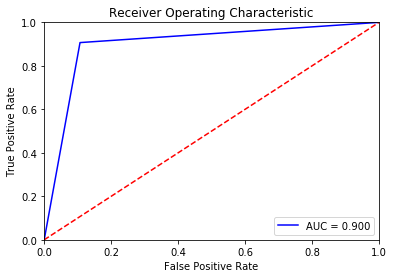

In [17]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_valid_count)
preds = probs[:,:]
fpr, tpr, threshold = metrics.roc_curve(test["label"], y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = "16"></a><br>
## Making Prediction

In [18]:
comment_1 = pd.Series("this film is very nice and good i like it")
comment_2 = pd.Series("no not good look at that shit very bad")

In [19]:
comment_1  = vectorizer.transform(comment_1)
comment_2 = vectorizer.transform(comment_2)

<a id = "17"></a><br>
## A Positive Comment

In [20]:
model.predict_classes(comment_1)

array([[1]], dtype=int32)

<a id = "18"></a><br>
## A Negative Comment

In [21]:
model.predict_classes(comment_2)

array([[0]], dtype=int32)